# 目的
- チョコボール数検出のモデルのテスト

In [1]:
import matplotlib.pyplot as plt

import os
import glob
import numpy as np
from PIL import Image

from chainercv.utils import read_image
from chainercv.visualizations import vis_bbox
from chainercv.links import FasterRCNNVGG16

import create_bbox_data as bbox

In [2]:
HOME = './'

# データロード

## 画像データのロード

In [3]:
data_dir = os.path.join(HOME, 'data/res_images')
img_files = glob.glob(os.path.join(data_dir, '*.JPG'))
print(len(img_files))

145


In [4]:
img_list = list()
for img_file in img_files:
    img = Image.open(img_file)
    img_arr = np.asarray(img).transpose(2,0,1).astype(np.float32) # Chainer入力用にarrayを変換
    img_list.append(img_arr)

## クラスラベル

In [5]:
file_classes = os.path.join(HOME, 'data/classes.txt')
classes = bbox.getClasses(file_classes)
print(classes)

['choco-ball', 'choco-package']


## モデルファイルのセット

In [6]:
pretrain_model = 'out/snapshot_model.npz'

model_frcnn = FasterRCNNVGG16(n_fg_class=len(classes),
                              pretrained_model=pretrain_model)
model_frcnn.to_gpu()

# 物体検出

In [14]:
import random

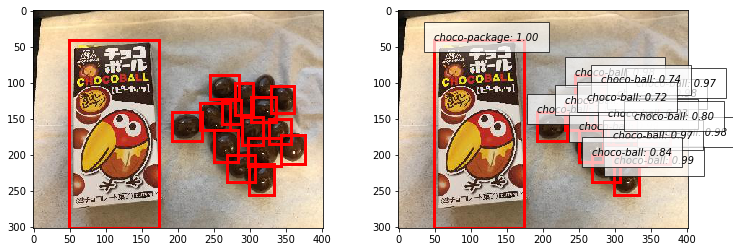

detected choco-ball :  14


In [50]:
#bboxes, labels, scores = model_frcnn.predict([img_list[0]])
img = random.choice(img_list)
bboxes, labels, scores = model_frcnn.predict([img])

fig = plt.figure(figsize=(12, 4))
ax = fig.subplots(1,2)
vis_bbox(img, bboxes[0], labels[0], ax=ax[0])
vis_bbox(img, bboxes[0], labels[0], scores[0], label_names=classes, ax=ax[1])
plt.show()
print("detected choco-ball : ", np.sum(labels[0] == 0))